In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
WORKDIR = os.path.join(os.getcwd(), 'names')

In [7]:
WORKDIR

'C:\\Users\\Диша\\PycharmProjects\\py_15_4.2\\names'

In [8]:
df = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'])

In [9]:
df

,A,B,C
0,0.371329,-0.612545,0.558481
1,-1.242985,-0.277041,-0.629809
2,0.654327,-0.351858,-1.177093
3,0.519447,0.327388,-1.124735
4,-0.317441,-0.245143,0.999544
5,-0.294376,0.207080,-0.721172
6,-0.439834,-0.546815,0.422073
7,-0.795363,1.448111,0.127841
8,-1.187688,-0.861945,0.461375
9,-1.039423,-0.316894,0.669464


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019983407DD8>,
      dtype=object)

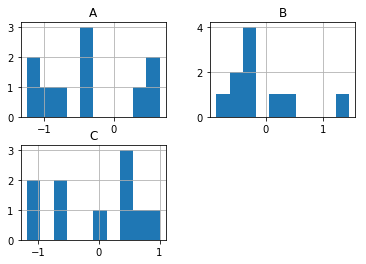

In [10]:
df.hist()

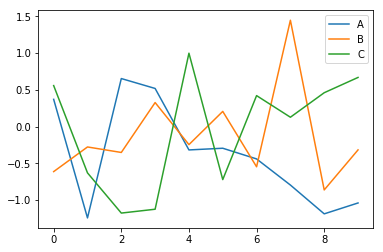

In [11]:
plot = df.plot()
fig = plot.get_figure()
fig.savefig("output.png")

In [12]:
names_by_year = {}
for year in range(1900, 2001, 10):
    with open('{}/yob{}.txt'.format(WORKDIR, year)) as f:
        names_by_year[year] = pd.read_csv(f, names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names = ['Year', 'Pos'])

In [13]:
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

In [14]:
[names_all.index.get_level_values(0), 'Name']

[Int64Index([1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,
             ...
             2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],
            dtype='int64', name='Year', length=148800), 'Name']

In [15]:
dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

In [16]:
dynamics

Count
Year Name           
1900 Aaron       103
     Abbie       112
     Abby          7
     Abe          56
     Abel         15
     Abigail      14
     Abner        21
     Abraham     100
     Abram        18
     Abron         5
     Ace           8
     Acie         10
     Acy           6
     Ada        1101
     Adabelle      5
     Adah         37
     Adaline      18
     Adam        111
     Adda         10
     Addie       551
     Addison      11
     Adel          8
     Adela        38
     Adelaida      8
     Adelaide    183
     Adelard       6
     Adelbert      7
     Adele       186
     Adelia       50
     Adelina      19
...              ...
2000 Zyanna       17
     Zyanne       12
     Zyanya       15
     Zyaria        7
     Zyasia       20
     Zyier         5
     Zyion        11
     Zykee         6
     Zykeia        5
     Zykeith       7
     Zykeria      54
     Zykeriah      5
     Zykerria     12
     Zykia        38
     Zykiera       5
     Zykira       10
     Zyla         10
     Zyler        13
     Zymir         8
     Zynia        11
     Zyniah        7
     Zyon         78
     Zyonna        5
     Zyquan       13
     Zyra          5
     Zyria        21
     Zyron        12
     Zyshaun       6
     Zyshawn      10
     Zyshonne     17

[135235 rows x 1 columns]

In [17]:
dynamics.query('Name == ["John", "Mary", "William"]')

Count
Year Name          
1900 John      9875
     Mary     16781
     William   8623
1910 John     11538
     Mary     22947
     William   8881
1920 John     57194
     Mary     71175
     William  50352
1930 John     52834
     Mary     64486
     William  47548
1940 John     54985
     Mary     56504
     William  44921
1950 John     79599
     Mary     65601
     William  60816
1960 John     76338
     Mary     51643
     William  49518
1970 John     58810
     Mary     19305
     William  39114
1980 John     35530
     Mary     11527
     William  25868
1990 John     29154
     Mary      8711
     William  24953
2000 John     20119
     Mary      6202
     William  20697

In [18]:
dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name')

Count                  
Name     John     Mary  William
Year                           
1900   9875.0  16781.0   8623.0
1910  11538.0  22947.0   8881.0
1920  57194.0  71175.0  50352.0
1930  52834.0  64486.0  47548.0
1940  54985.0  56504.0  44921.0
1950  79599.0  65601.0  60816.0
1960  76338.0  51643.0  49518.0
1970  58810.0  19305.0  39114.0
1980  35530.0  11527.0  25868.0
1990  29154.0   8711.0  24953.0
2000  20119.0   6202.0  20697.0

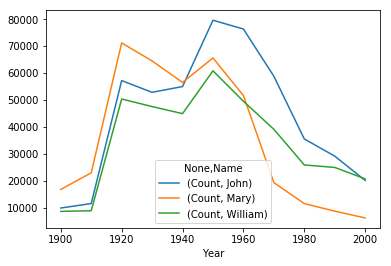

In [19]:
dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot()

In [20]:
gender_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Gender']).sum()
gender_dynamics.head(10)

Count
Year Gender         
1900 F        299800
     M        150483
1910 F        396502
     M        194213
1920 F       1198290
     M       1064391
1930 F       1125885
     M       1097274
1940 F       1143393
     M       1158985

In [21]:
gender_dynamics.unstack()

Count         
Gender        F        M
Year                    
1900     299800   150483
1910     396502   194213
1920    1198290  1064391
1930    1125885  1097274
1940    1143393  1158985
1950    1713151  1790549
1960    2022018  2132359
1970    1748175  1859245
1980    1660147  1784390
1990    1898046  2052946
2000    1815110  1962969

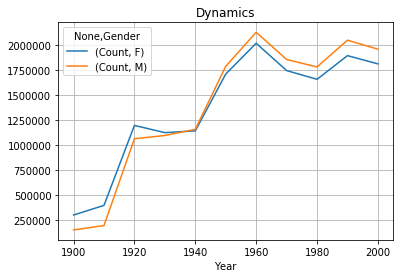

In [22]:
gender_dynamics.unstack().plot(title='Dynamics', grid=True)

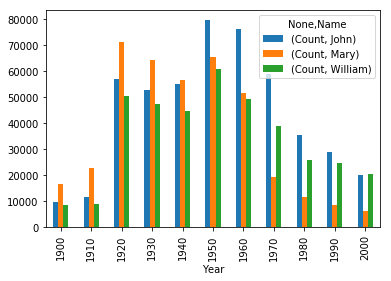

In [23]:
dynamics.query('Name == ["John", "Mary", "William"]').unstack('Name').plot.bar()

In [24]:
names_for_pie = names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)

In [25]:
names_for_pie

,Count
Name,
James,497615
John,485976
Robert,473551
Michael,424802
Mary,394882


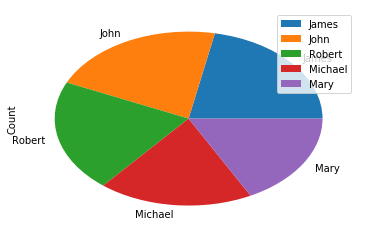

In [26]:
names_for_pie.plot.pie(y='Count')

In [27]:
names_all.sort_values('Count', ascending=False).head(1)

,,Name,Gender,Count
Year,Pos,,,
1950,6111,James,M,86239


In [28]:
names_all['Len'] = names_all.apply(lambda row: len(row.Name), axis=1)

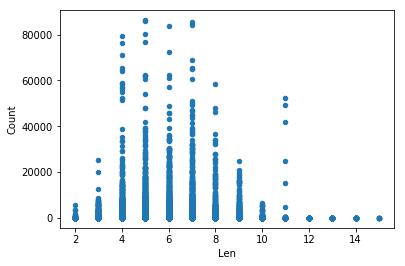

In [29]:
names_all.plot.scatter(x='Len', y='Count')

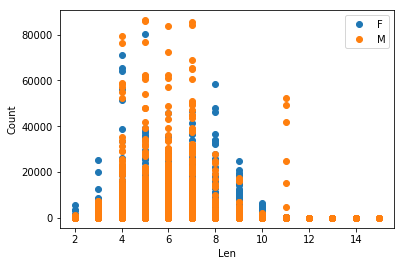

In [30]:
def scatter_len(group):
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)

names_all.groupby('Gender').apply(scatter_len)
plt.xlabel('Len')
plt.ylabel('Count')
plt.legend()

""


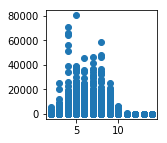

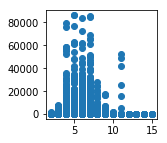

In [31]:
def scatter_len(group):
    plt.figure(figsize=(2,2))
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)

names_all.groupby('Gender').apply(scatter_len)